In [1]:
import numpy as np
import matplotlib.pyplot as pl
import cv2 as cv

path = '/exchange/cvai/images/'

In [2]:
rgb = cv.imread (path + 'lenna-blurred.jpg')
gray = cv.cvtColor (rgb, cv.COLOR_BGR2GRAY) / 255.0

In [13]:
cv.imwrite("lenna-blurred.jpg", rgb)

error: OpenCV(4.11.0) /io/opencv/modules/highgui/src/window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [3]:
def Show (img):
    print (np.min (img), np.max (img))
    pl.imshow (img, cmap = 'gray')

0.12156862745098039 0.8823529411764706


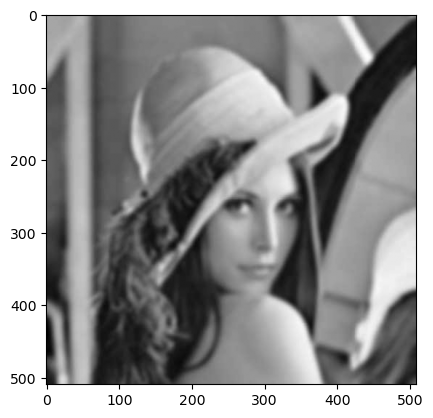

In [4]:
Show (gray)

0.15384998957111462 0.8415858641959356


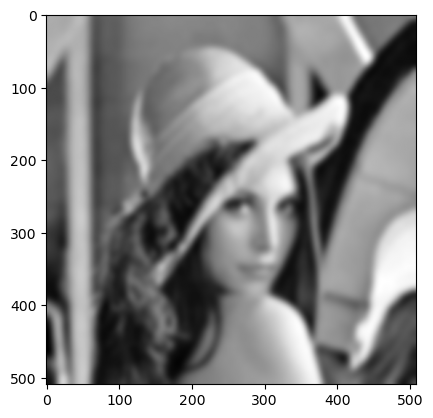

In [5]:
size = 21
blur = cv.GaussianBlur (gray, (size, size), 0)
Show (blur)

-0.12015763789161257 0.12717910568010293


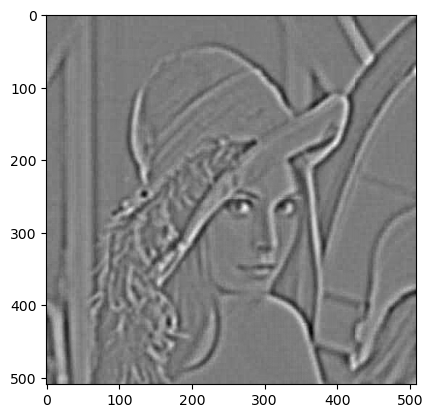

In [6]:
mask = gray - blur
Show (mask)

-0.16439448230228867 1.1648576405267879


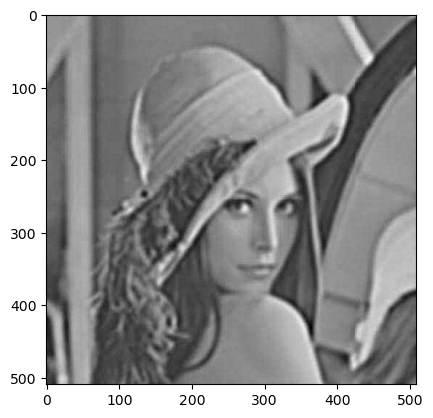

In [7]:
sharp = gray + 3 * mask
Show (sharp)

0.12156862745098039 0.8823529411764706
-0.16439448230228867 1.1648576405267879


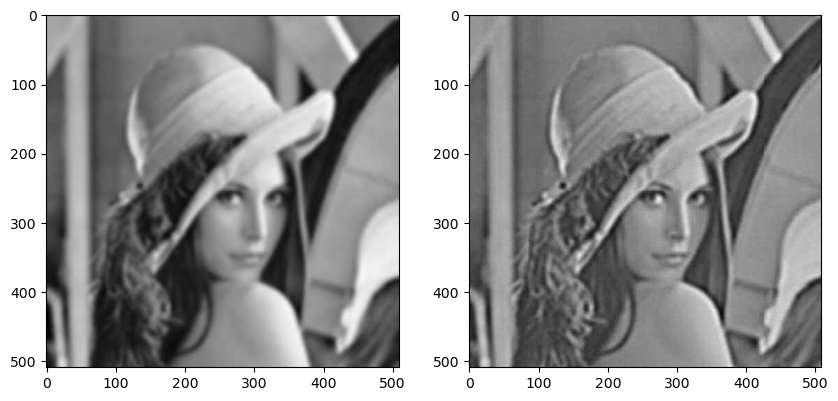

In [10]:
pl.figure (figsize = (10, 5))
pl.subplot (1, 2, 1); Show (gray)
pl.subplot (1, 2, 2); Show (sharp)

0.12156862745098039 0.8823529411764706
-0.06620110286758116 1.0799012499534462
-0.4047097580855139 1.3767235185250386
-0.7227761330105076 1.6900506327227403
-0.9776386688667238 1.9589853774403316
-1.1714600168205773 2.1720067160945122


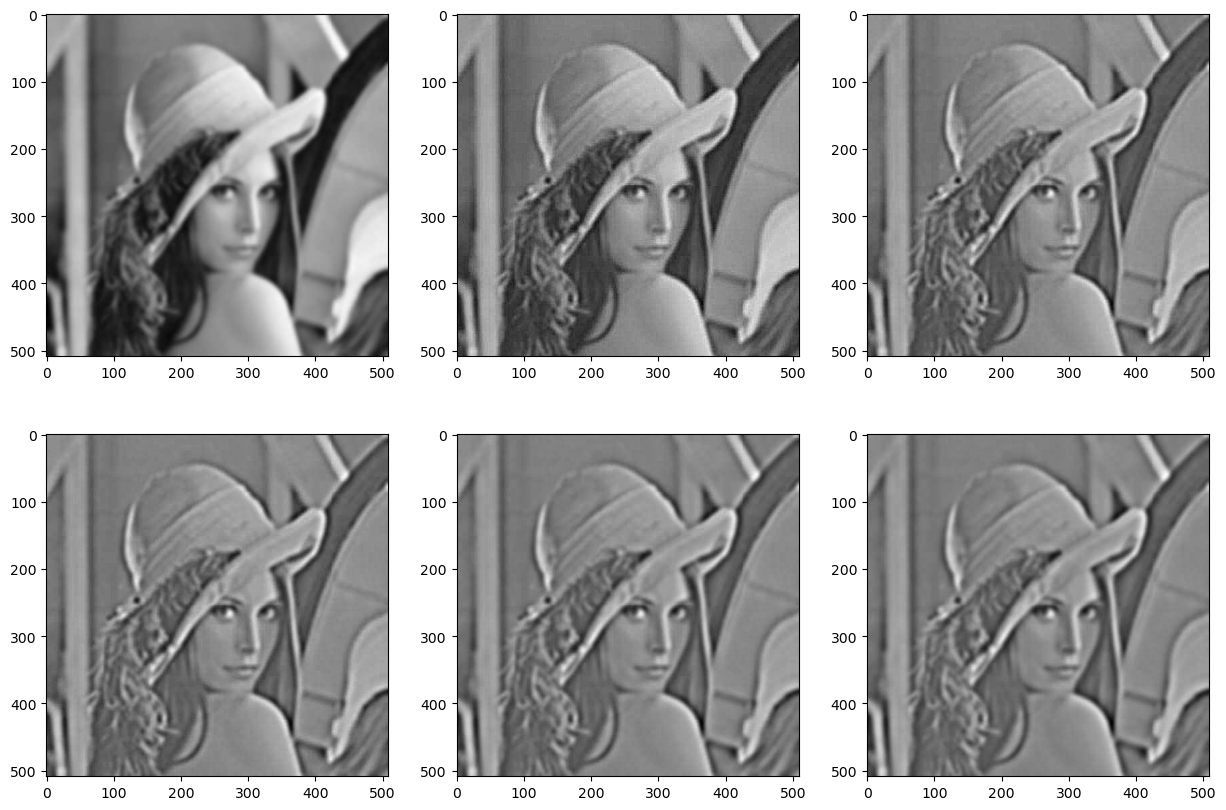

In [14]:
def Sharpen (image, radius, weight):
    size = 2 * radius + 1
    blur = cv.GaussianBlur (image, (size, size), 0)
    mask = image - blur
    sharp = image + weight * mask
    return sharp

weight = 5
pl.figure (figsize = (15, 10))
pl.subplot (2, 3, 1); Show (gray)
pl.subplot (2, 3, 2); Show (Sharpen (gray,  5, weight))
pl.subplot (2, 3, 3); Show (Sharpen (gray, 10, weight))
pl.subplot (2, 3, 4); Show (Sharpen (gray, 15, weight))
pl.subplot (2, 3, 5); Show (Sharpen (gray, 20, weight))
pl.subplot (2, 3, 6); Show (Sharpen (gray, 25, weight))